In [1]:
# import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data[data["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [7]:
data[data["Reviews"]=="3.0M"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
data.drop(data.index[10472],inplace=True)

# Removing 10472 due to mismatched value

Removing '+' from the values of number of installs and converting it to numeric


In [9]:
data["Installs"] = data["Installs"].map(lambda x: x.rstrip("+"))

In [10]:
data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",",""))

In [11]:
data["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Removing "$" values from Price and converting it to numeric

In [19]:
data["Price"] = pd.to_numeric(data["Price"].str.replace("$",""))

In [21]:
data["Installs"].min(),data["Installs"].max()

(0, 1000000000)

As we can see, there is a high variance in the number of installs. To remove this we will add a new column to the dataframe, which is log of number of Installs.

In [22]:
data["Log_installs"] = np.log(data["Installs"])

Checking if the dataframe contains any duplicate values for the same App name

In [23]:
data['App'].duplicated().sum()

1181

In [25]:
data['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
                                                    ..
Chef - Recipes & Cooking                             1
P XPERIA Theme™ | PURPLE - Design For SONY 🎨         1
PeopleTV - Watch Celebrity News                      1
Lanterns: The Harvest Festival                       1
eu sou franky                                        1
Name: App, Length: 9659, dtype: int64

As we can see from above data that some of the apps are having multiple rows. Let's check if the data is identical of not 

In [26]:
data[data["App"]=="ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_installs
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,18.420681
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,18.420681
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,18.420681
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,18.420681
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,18.420681
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,18.420681
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,18.420681
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,18.420681
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,18.420681


As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.

In [27]:
data.drop_duplicates(inplace=True)

Converting type of Reviews column to numeric

In [28]:
data['Reviews'] = pd.to_numeric(data["Reviews"].str.replace("$",""))

In [30]:
data.loc[data.groupby(["App"])["Reviews"].idxmax()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_installs
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500,Free,0.00,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,6.214608
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,1000000,Free,0.00,Everyone,Social,"August 2, 2018",5.03,4.1 and up,13.815511
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,10000,Free,0.00,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,9.210340
4541,.R,TOOLS,4.5,259,203k,10000,Free,0.00,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,9.210340
4636,/u/app,COMMUNICATION,4.7,573,53M,10000,Free,0.00,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,9.210340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59M,100000,Free,0.00,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up,11.512925
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,9.210340
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,1000000,Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up,13.815511
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,10000,Free,0.00,Everyone,Tools,"October 21, 2017",1.0,4.2 and up,9.210340


In [31]:
# Setting up the parameters for the plots

In [34]:
sns.set_style("darkgrid")
plt.rcParams["font.size"]=14
plt.rcParams["figure.figsize"]=(9,5)
plt.rcParams["figure.facecolor"]="#00000000"

Top 20 Apps present in Google Play Store as per their Geners

In [41]:
top_genres = data.Genres.value_counts().reset_index().rename(columns={"Genres":"Count","index":"Genres"})

In [42]:
genres_installs = data.groupby(["Genres"])[["Installs"]].sum()

In [43]:
top_genres_installs = pd.merge(top_genres, genres_installs, on="Genres")


In [44]:
top_20_genres_installs = top_genres_installs.head(20)

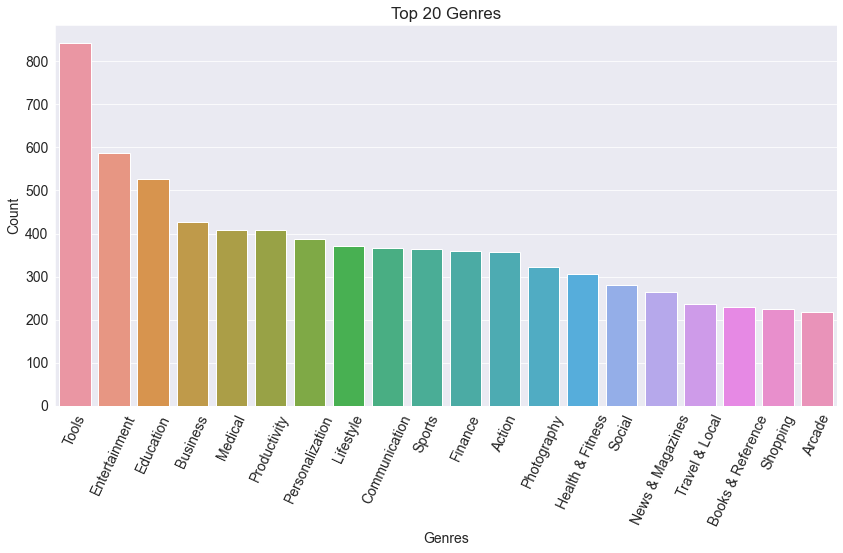

In [46]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()

Which are Genres that are getting installed the most in top 20 Genres?

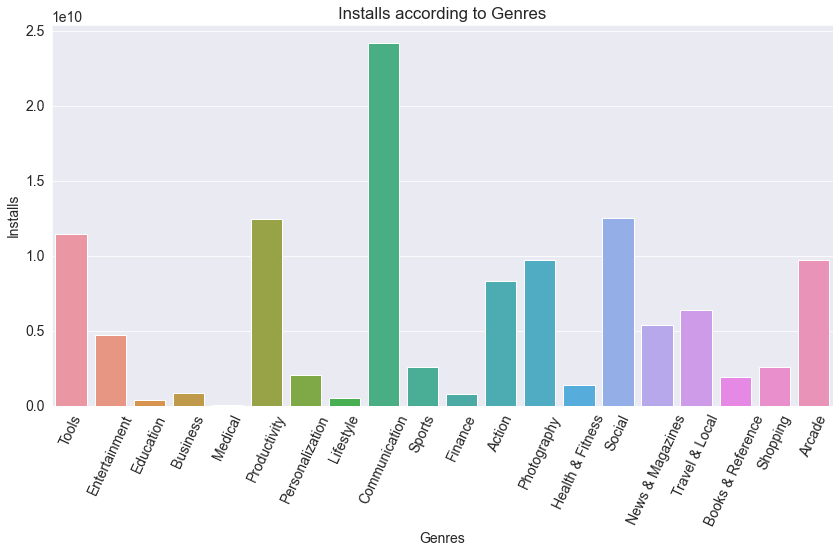

In [47]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

As we can see from the above two plots: Maxinum number of apps present in google play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.

In [48]:
top_category = data.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [50]:
category_installs = data.groupby(['Category'])[['Installs']].sum()

In [51]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

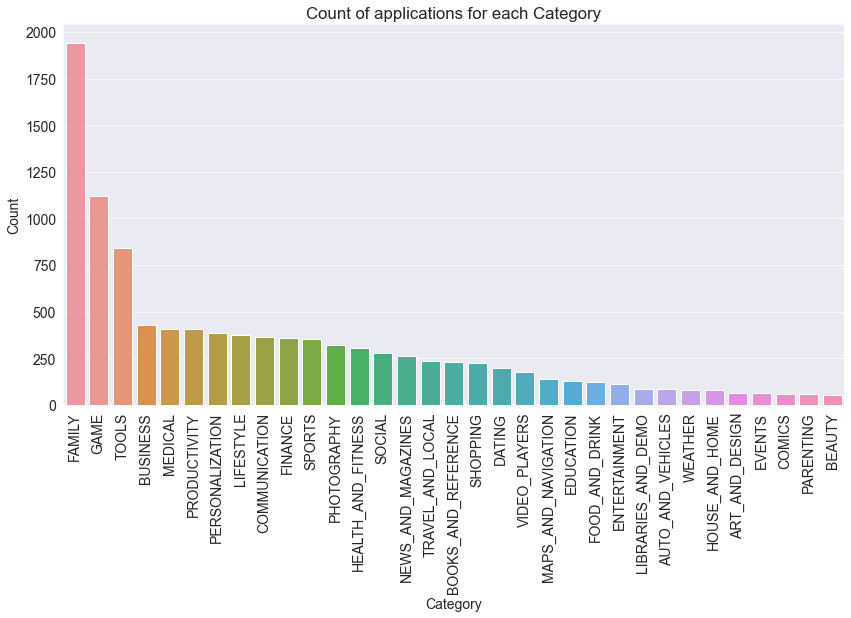

In [52]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
plt.show()

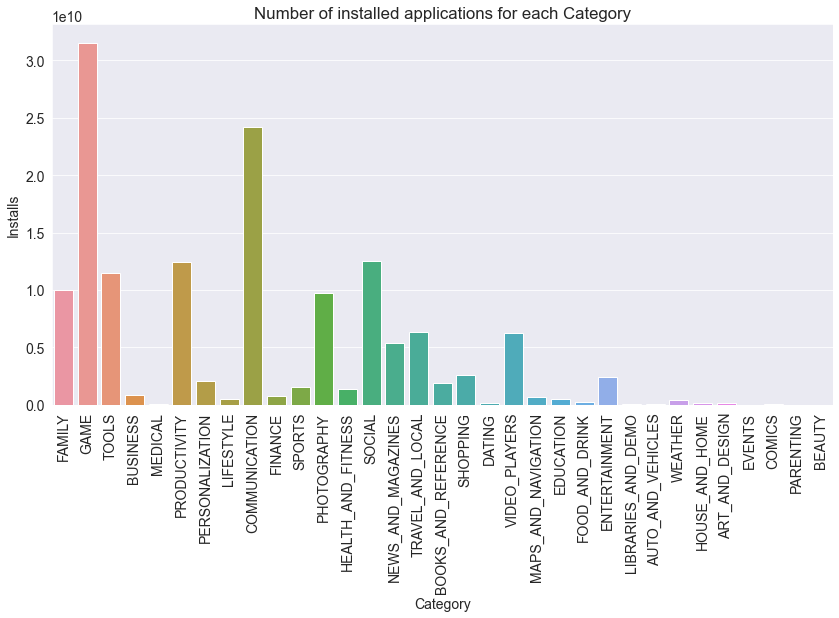

In [53]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
plt.show()

As we can see from the above two plots: Maxinum number of apps present in google play store comes under Family, Games and Tools Category but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Games, Communication and Tools.

Average Rating

In [55]:
genres_ratings = data.groupby(["Genres"])[["Rating"]].mean()

In [56]:
genre_rating_installs = pd.merge(top_genres_installs,genres_ratings, on="Genres")

In [60]:
genre_rating_installs['Rating'].describe()

count    115.000000
mean       4.258865
std        0.182193
min        3.800000
25%        4.148914
50%        4.266667
75%        4.354464
max        4.800000
Name: Rating, dtype: float64

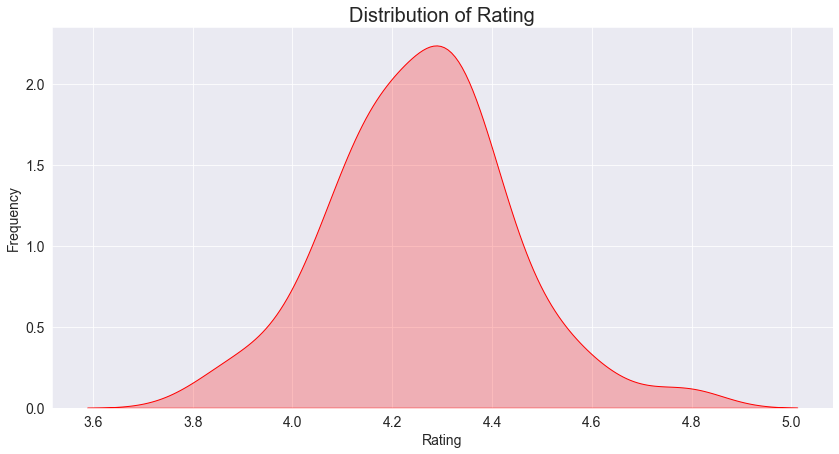

In [61]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genre_rating_installs.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

Highest and Lowest Rated Genres

In [63]:
genre_rating_installs.sort_values("Rating",ascending=False,inplace=True)

In [64]:
highest_rated_genres = genre_rating_installs.iloc[0:20]
lowest_rated_genres = genre_rating_installs.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

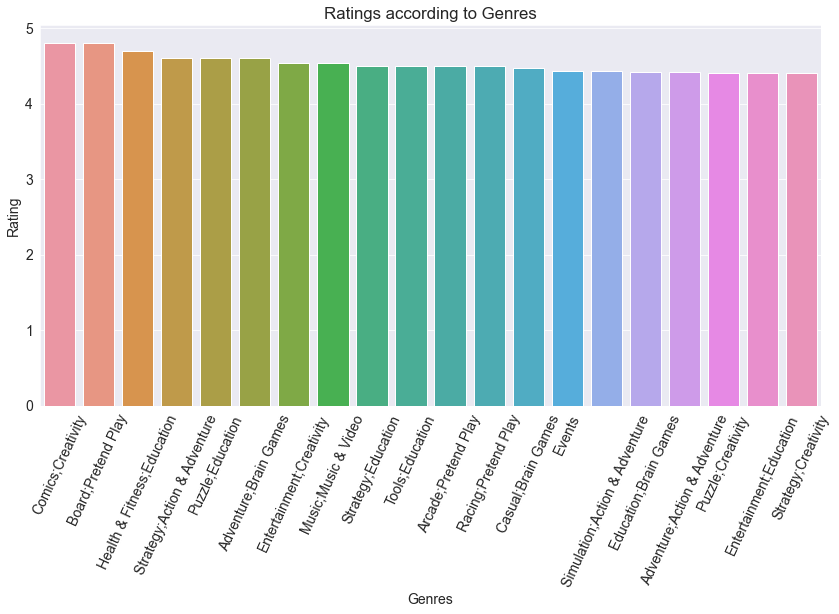

In [65]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

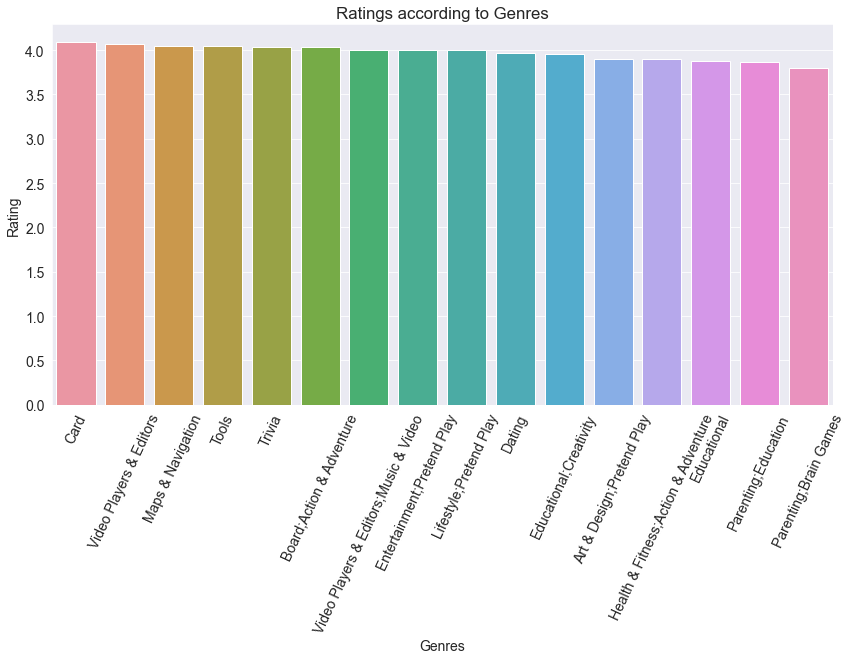

In [66]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)
plt.show()

What are the count of applications in each category differentiated by their type?

In [68]:
app_count = data.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [69]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

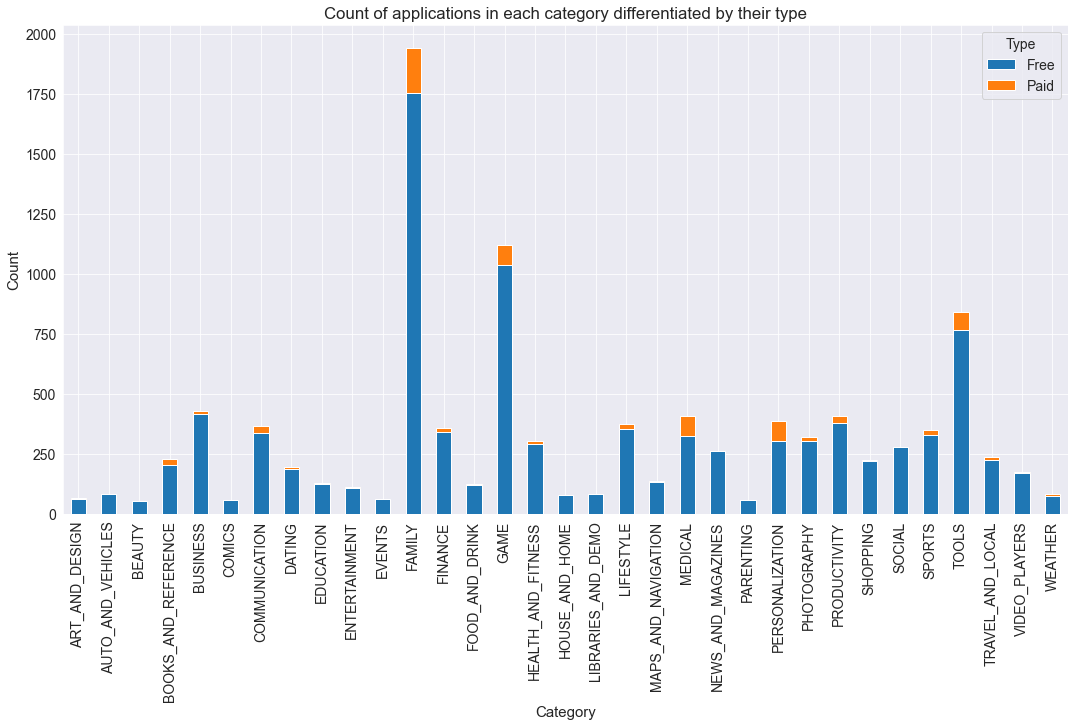

In [71]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Food & Drink and Tools, as well as Social categories were free to install. At the same time Family, Sports, Tools and Medical categories had the biggest number of paid apps available for download.

In [72]:
data['Gaming Category App'] = data['Category']=='GAME'

In [73]:
categoty_type_installs = data.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [74]:
categoty_type_installs['log_Installs'] = np.log10(categoty_type_installs['Installs'])

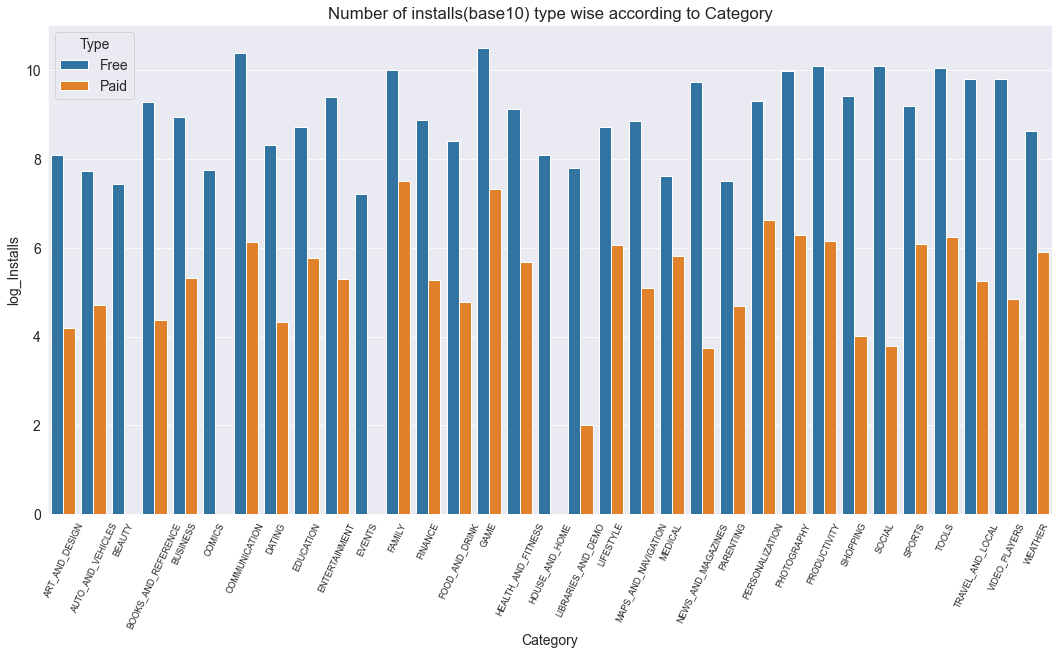

In [75]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs(base10)")
plt.title("Number of installs(base10) type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

It can be concludd that the number of free applications installed by the user are high when compared with the paid ones.


Size of the applications present in the datset are in MB and KB. Therefore for ease in data processing, converting entire size column to MB.

In [76]:
# Converting KB to MB 
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))

How does size impact on the number of installs of any application?


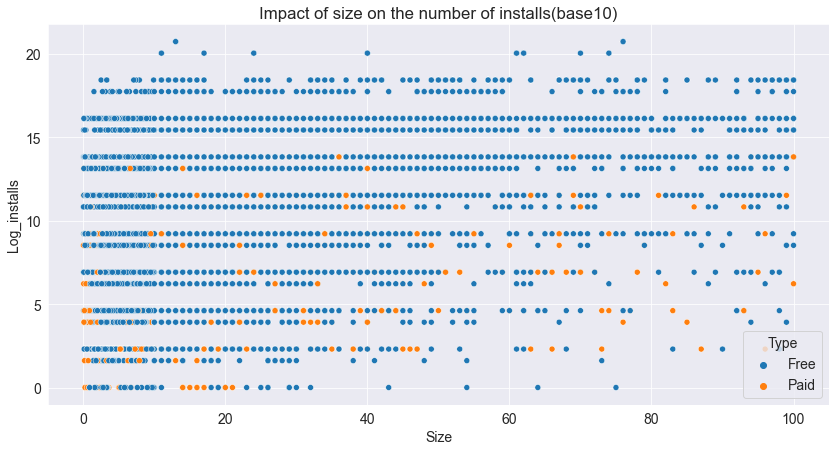

In [81]:
plt.figure(figsize=(14,7))
plt.title("Impact of size on the number of installs(base10)")
sns.scatterplot(data['Size'], data['Log_installs'], hue=data['Type'])
plt.show()

It is clear from the above mentioned plot that size may impact the number of installations. Bulky applications are less installed by the user.

Histogram of Size 

In [86]:
# to remove from size column
data.loc[data["Size"].isnull(),"Size"]=0

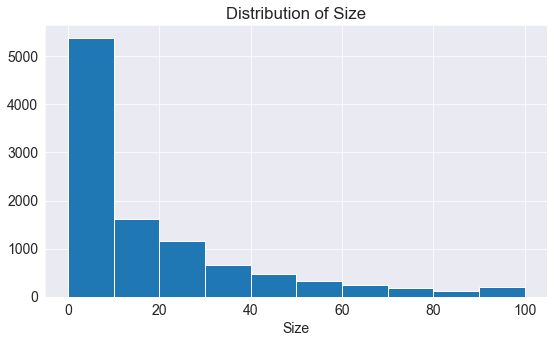

In [87]:
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(data["Size"])
plt.show()

From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.

Merging Dataframe on Apps

In [92]:
user_reviews = pd.read_csv("googleplaystore_user_reviews.csv")


In [94]:
merged_df = data.merge(user_reviews, on="App")

 In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].

In [96]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [97]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

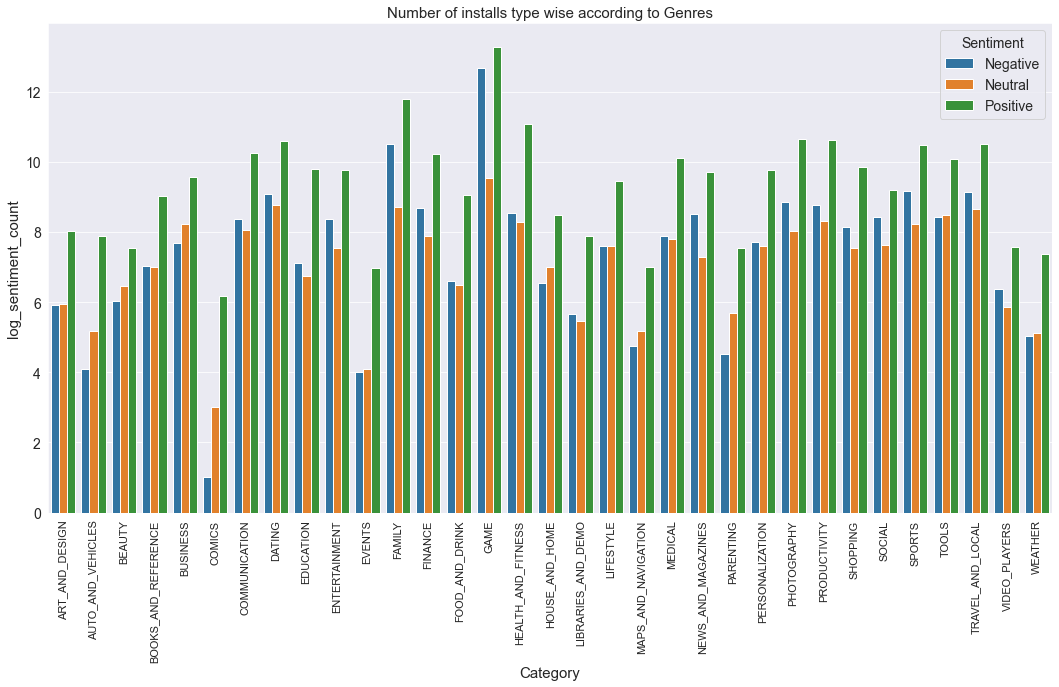

In [98]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

Histogram of Subjectivity

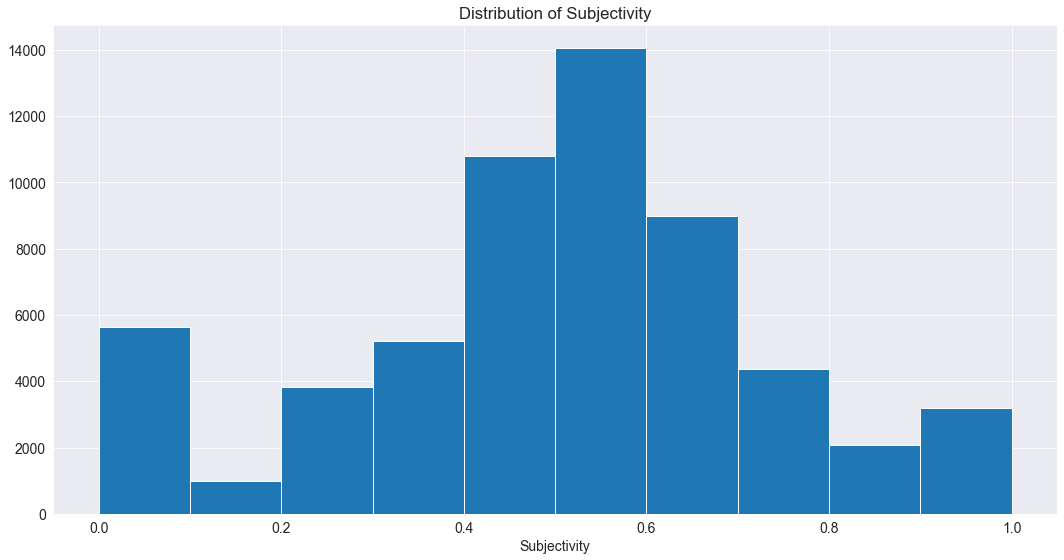

In [99]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that macimum number of users give reviews to the applications, according to their experience.


Percentage Review of Sentiments

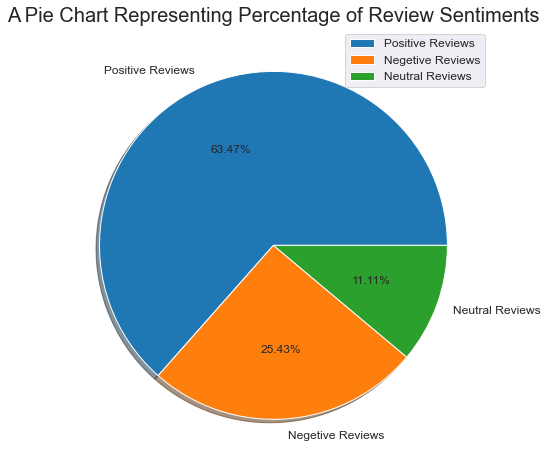

In [102]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()